# Intro to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

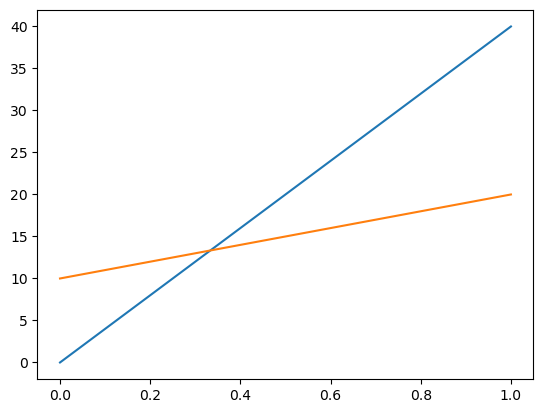

In [2]:
plt.plot([[0, 10],[40, 20]]);

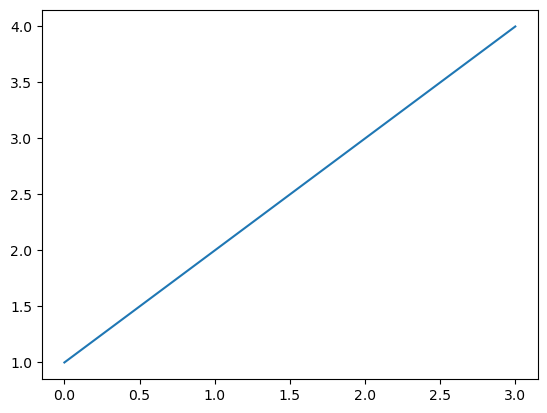

In [3]:
plt.plot([1, 2, 3, 4]);

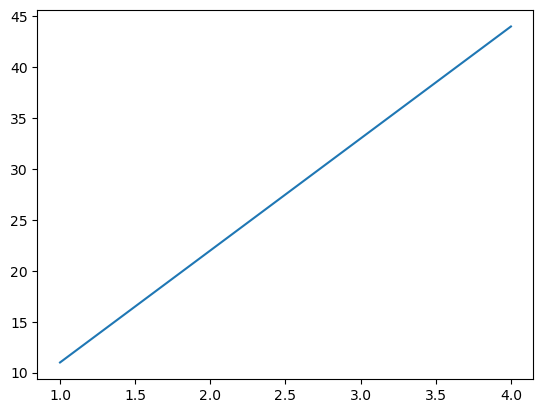

In [4]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y);

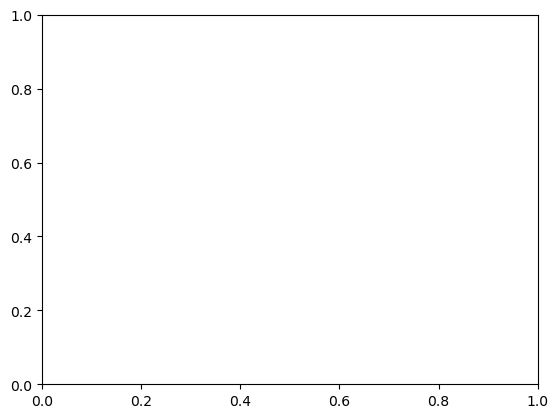

In [5]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

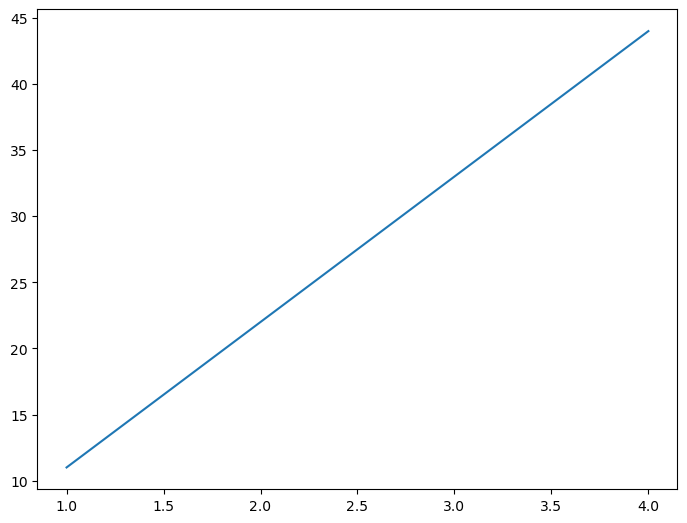

In [6]:
# 2nd method
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

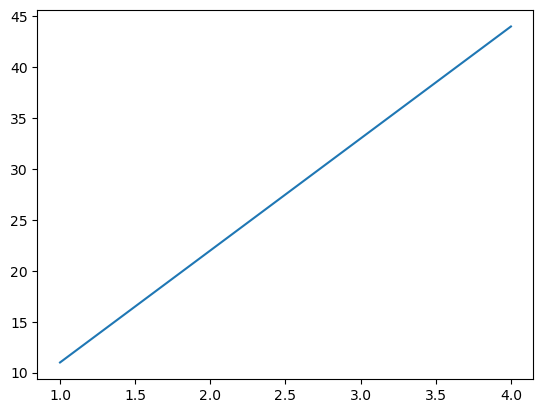

In [7]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y);


(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

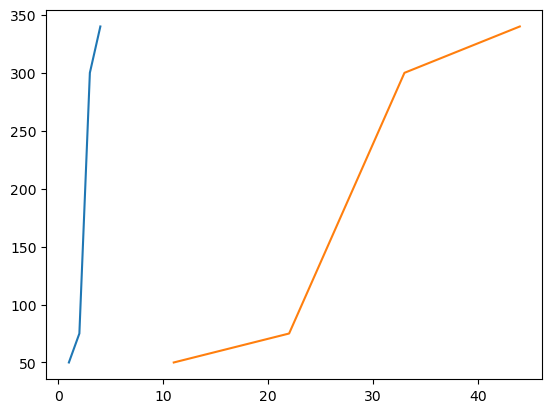

In [8]:
fig, ax = plt.subplots()
ax.plot(x, [50, 75, 300, 340]);
ax.plot(y, [50, 75, 300, 340])
type(fig), type(ax)

## Matplotlib example workflow

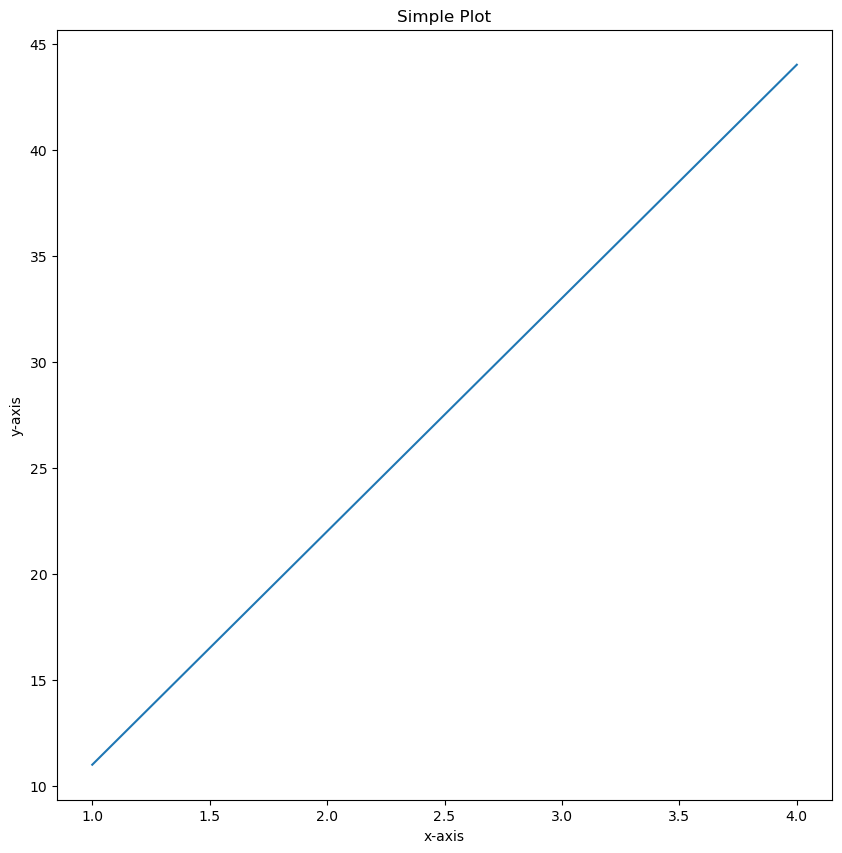

In [9]:
# 0. import matplotlib for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # figsize(width, height)

# 3. plot data
ax.plot(x, y);

# 4. Cutomize plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. Save & show plot (save the whole figure)
fig.savefig("./image/simple-plot.png")

## Making figures with NumPy arrays

* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [10]:
import numpy as np

In [11]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

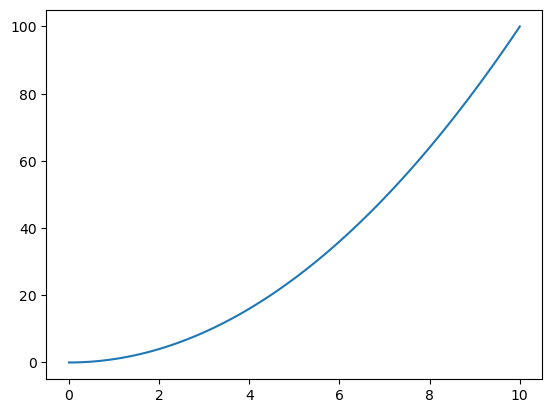

In [12]:
# Plot the data
fig, ax = plt.subplots()
ax.plot(x, x**2);

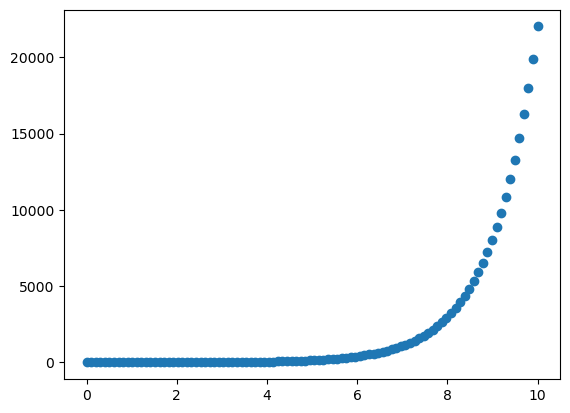

In [13]:
# Use the same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

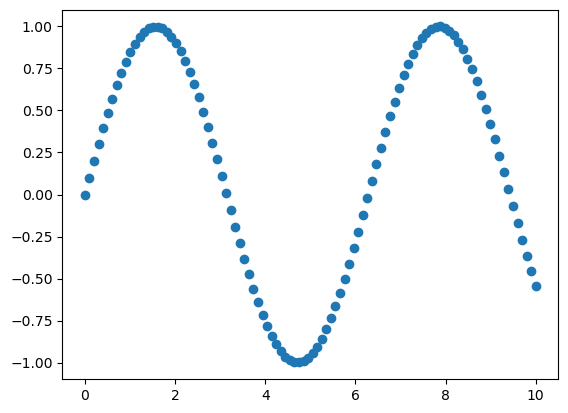

In [14]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

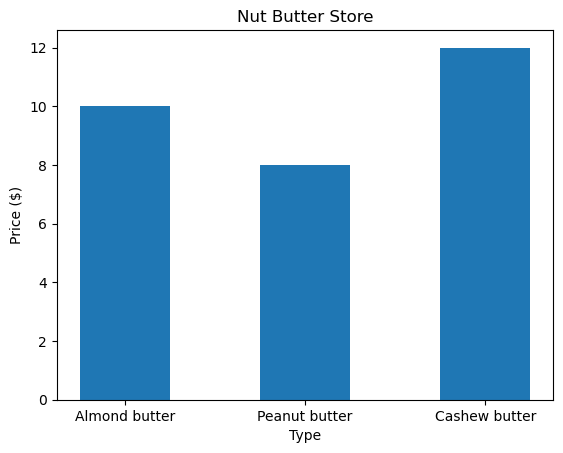

In [16]:
# Make a plot from dictionary
nut_butter_prices = {
    "Almond butter": 10,
    "Peanut butter": 8,
    "Cashew butter": 12
}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), height=nut_butter_prices.values(), width= 0.5)
ax.set(title="Nut Butter Store", xlabel="Type", ylabel="Price ($)");

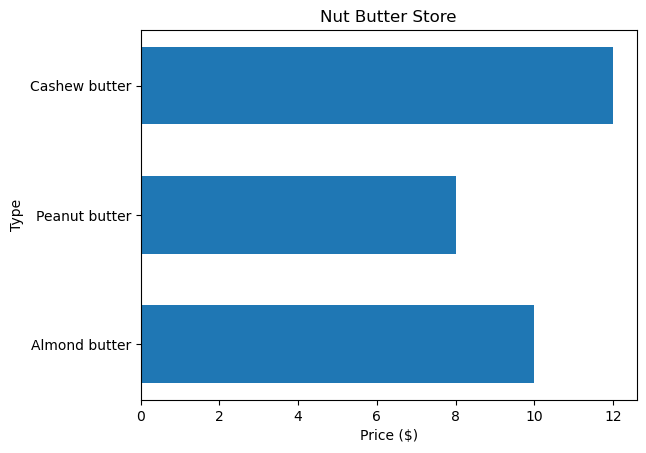

In [25]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()), height=0.6)
ax.set(title="Nut Butter Store", xlabel="Price ($)", ylabel="Type");

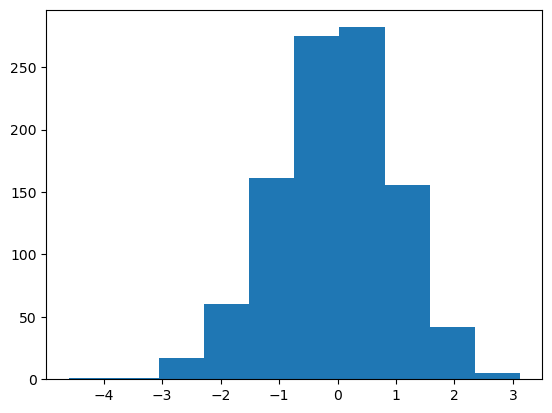

In [29]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots 

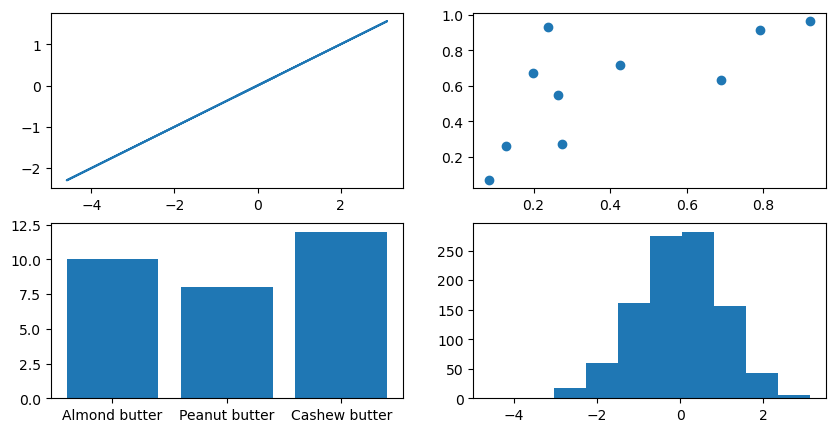

In [38]:
# Subplot option 1
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Plot to each axis
ax0.plot(x, x/2);
ax1.scatter(np.random.random(10), np.random.random(10));
ax2.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax3.hist(x);

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

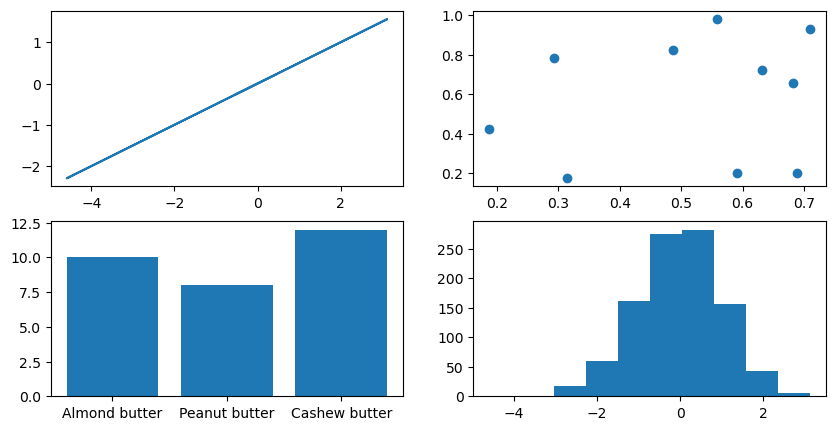

In [51]:
# Subplot option 2
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5));

# Plot to each axis
ax[0, 0].plot(x, x/2)
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1, 1].hist(x);

ax

In [49]:
# Plot to each axis
ax[0, 0].plot(x, x/2)
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax[1, 1].hist(x);

## Plotting from Pandas Dataframes

In [73]:
import pandas as pd

In [74]:
# Make a dataframe
car_df = pd.read_csv("car-sales.csv")
car_df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<Axes: >

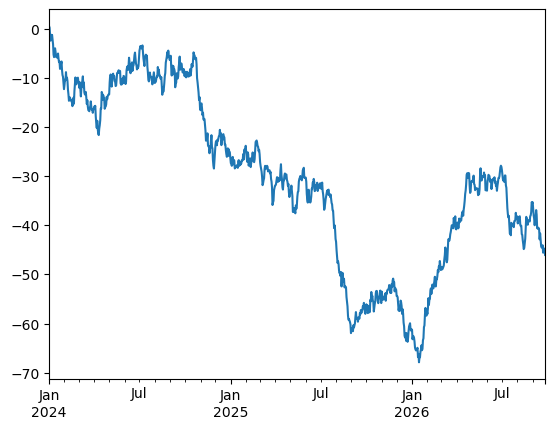

In [75]:
np.random.seed(123456)

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2024", periods=1000))
ts = ts.cumsum()

ts.plot()

In [76]:
car_df["Price"] = car_df['Price'].str.replace(r'[\$\.\,]', '', regex = True)
car_df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [77]:
car_df["Price"] = car_df['Price'].str[:-2]
car_df['Price'] = car_df['Price'].astype(int)
car_df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [78]:
car_df['Sale Date'] = pd.date_range("1/1/2020", periods=len(car_df))
car_df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [80]:
car_df['Total Sales'] = car_df['Price'].cumsum()
car_df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


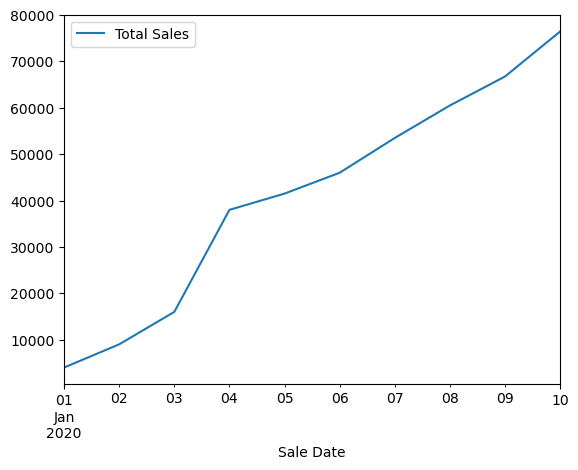

In [81]:
# Plot total sales
car_df.plot(x="Sale Date", y="Total Sales");

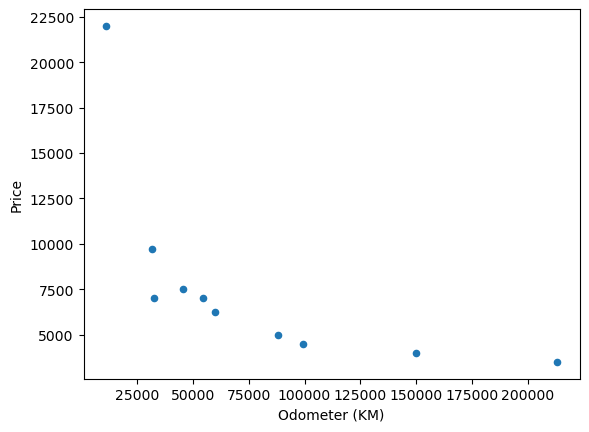

In [83]:
car_df.plot(x='Odometer (KM)', y="Price", kind="scatter");

In [84]:
# Bar Graph
x = np.random.rand(10, 4)
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.365956,0.024949,0.240687,0.012899
1,0.746317,0.176577,0.039863,0.106379
2,0.116694,0.050626,0.839019,0.298509
3,0.307938,0.689462,0.181594,0.326069
4,0.441359,0.769168,0.501312,0.037995
5,0.689450,0.984570,0.889612,0.530526
6,0.562271,0.277608,0.022471,0.279898
7,0.776647,0.068914,0.811207,0.063474
8,0.766179,0.193433,0.873315,0.437170
9,0.672644,0.604968,0.402883,0.309529


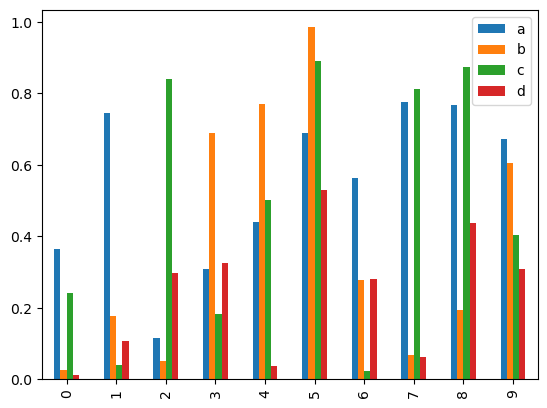

In [85]:
df.plot.bar();

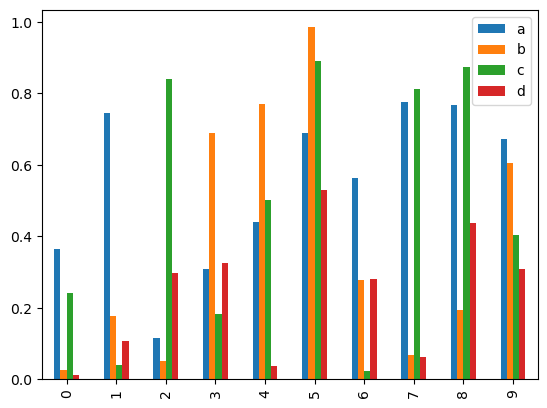

In [87]:
df.plot(kind="bar");

In [88]:
car_df

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


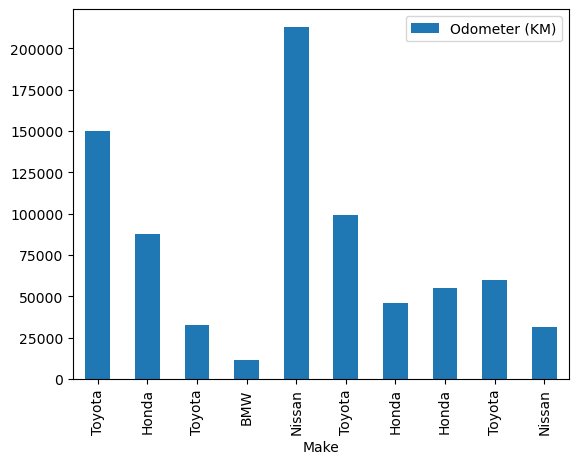

In [89]:
car_df.plot(x="Make", y="Odometer (KM)", kind="bar");

<Axes: ylabel='Frequency'>

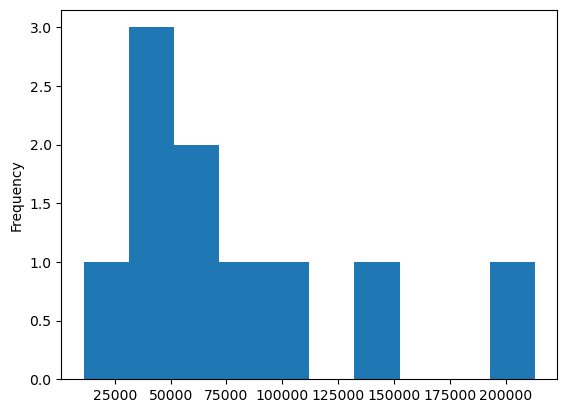

In [98]:
# Histograms
car_df['Odometer (KM)'].plot(kind='hist')

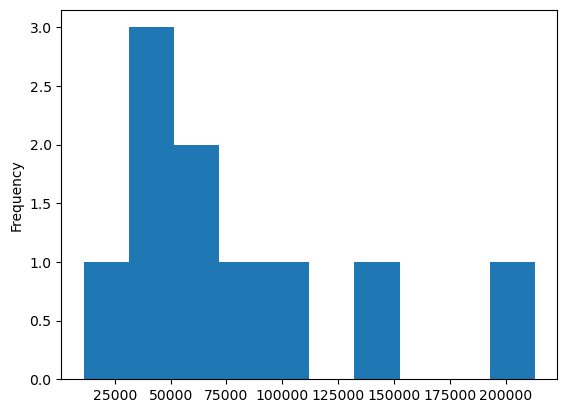

In [101]:
car_df['Odometer (KM)'].plot.hist(bins=10);

In [102]:
hd_df = pd.read_csv("heart-disease.csv")
hd_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: ylabel='Frequency'>

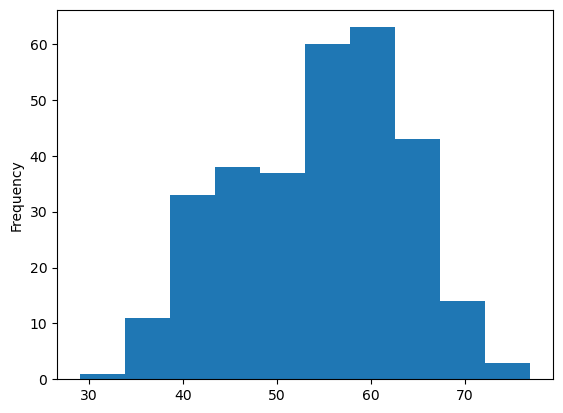

In [105]:
# Create a hist of age
hd_df['age'].plot.hist(bins=10)

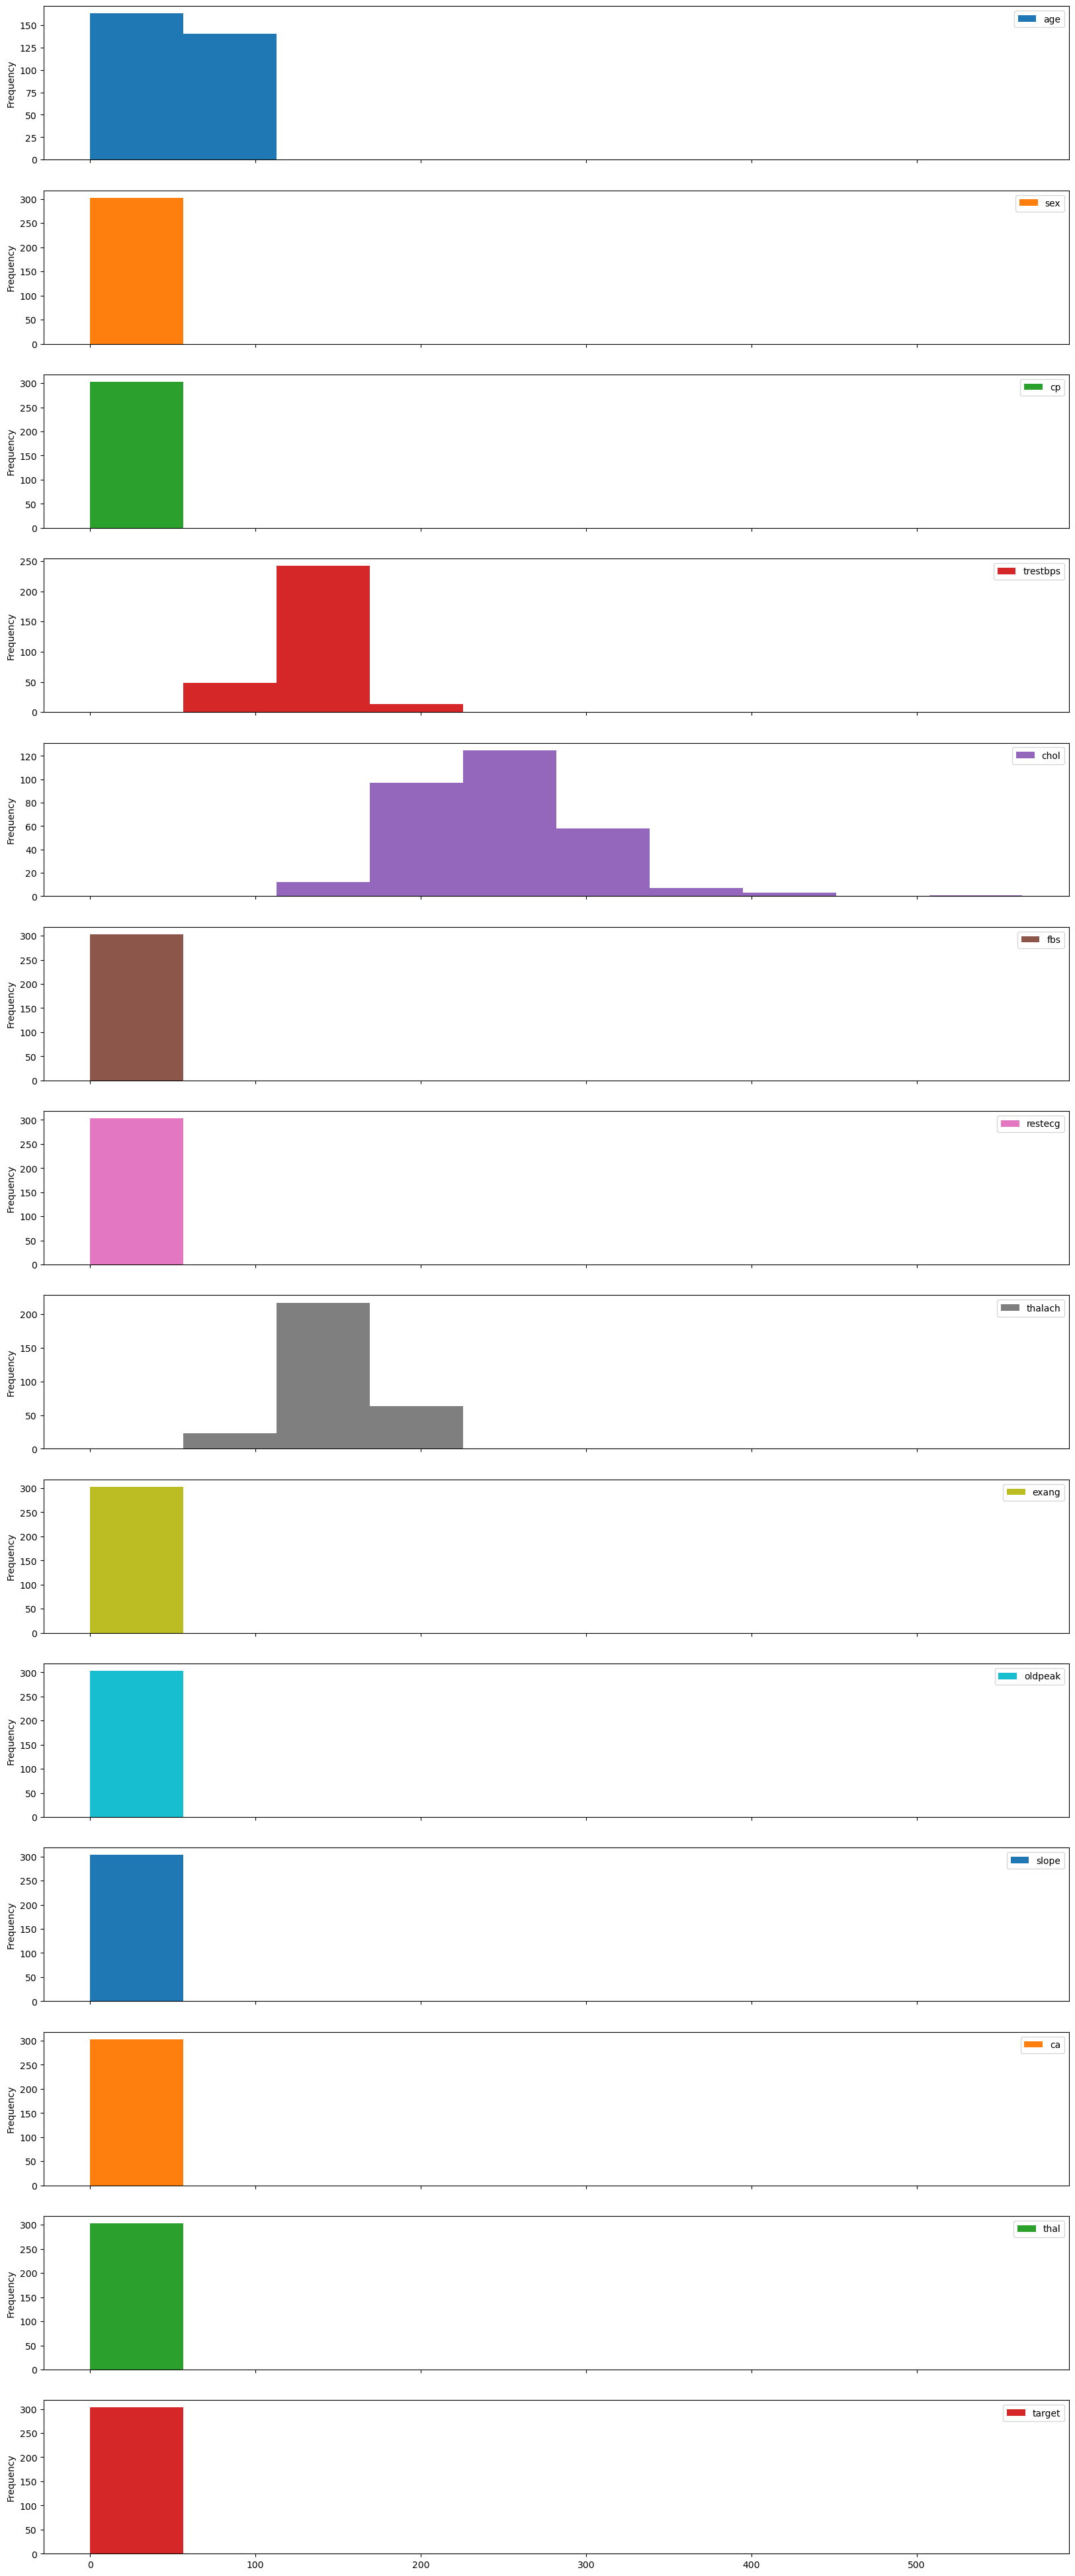

In [110]:
hd_df.plot.hist(figsize=(20, 50), subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method)

* When plotting something quickly, okay to use pyplot method
* OO is for more advanced plotting

In [113]:
over_50 = hd_df[hd_df['age'] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


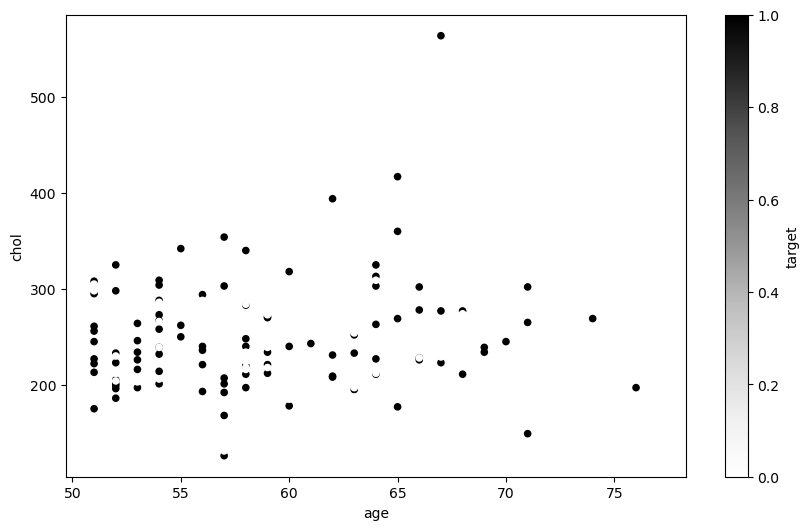

In [119]:
# Pyplot method (Quick, less details)
over_50.plot(kind='scatter', x='age', y='chol', c='target', figsize=(10, 6));

<Axes: xlabel='age', ylabel='chol'>

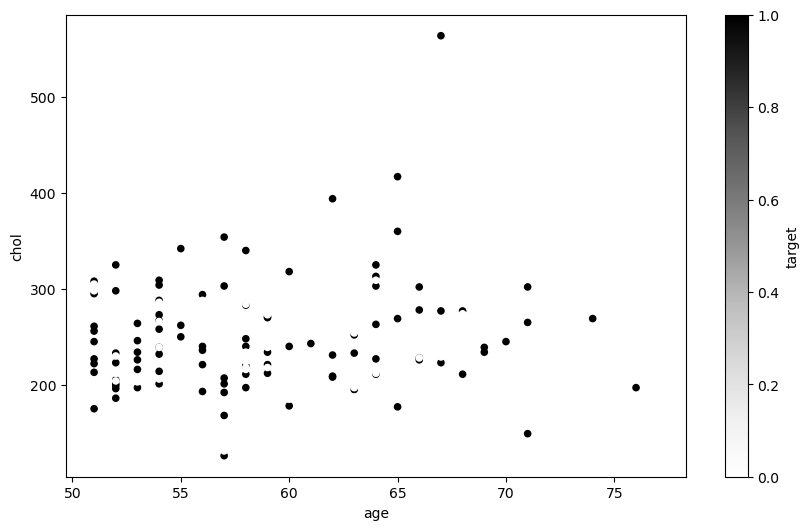

In [123]:
# OO method mixed with pyplot
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter', x='age', y='chol', c='target', ax=ax);

#ax.set_xlim([45, 100])

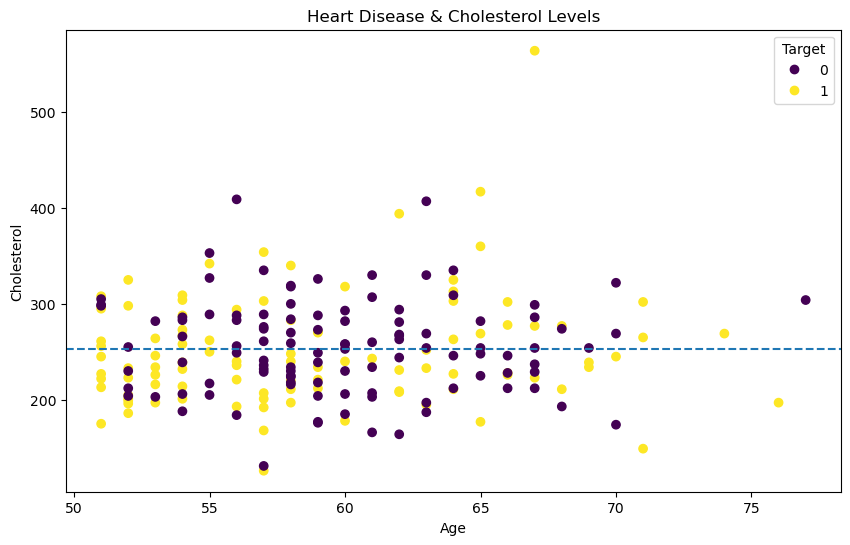

In [135]:
# Real OO method
fig, ax = plt.subplots(figsize=(10, 6));

# PLot the data
scatter = ax.scatter(x=over_50['age'], y=over_50['chol'], c=over_50['target']);

# Customize the plot
ax.set(title="Heart Disease & Cholesterol Levels", xlabel="Age", ylabel='Cholesterol');

# Add legends
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50['chol'].mean(), linestyle='--')

In [136]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


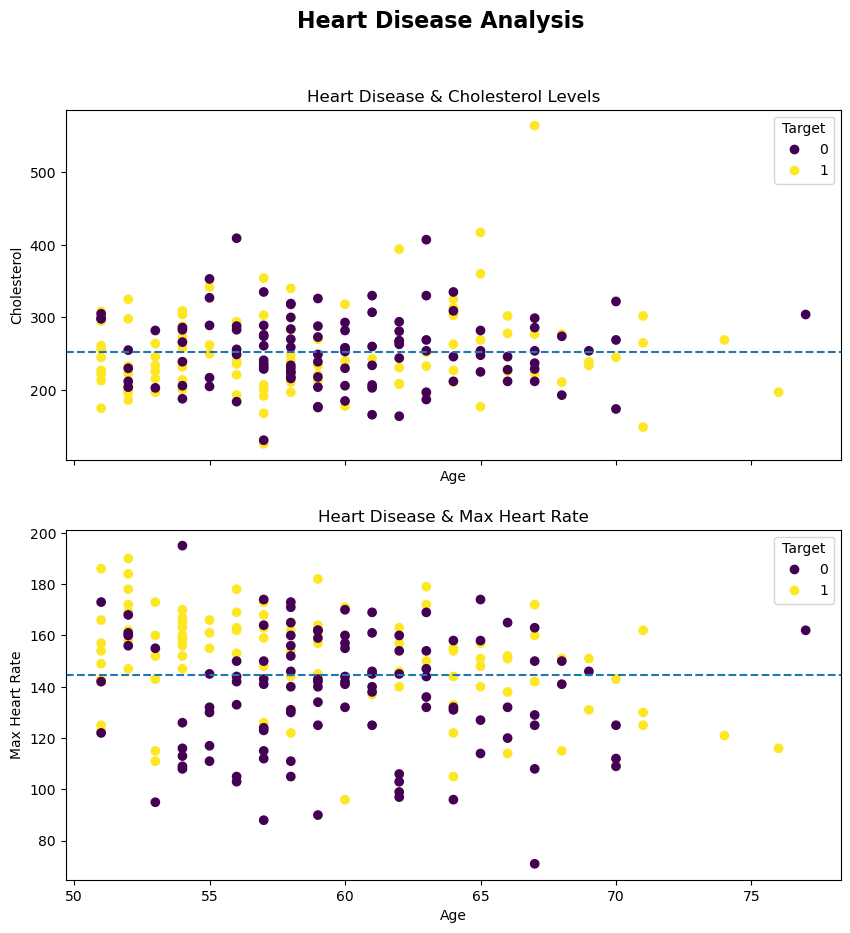

In [149]:
# Sublot of chol / age, thatlach /age

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True);

# Ax0
# PLot the data
scatter = ax0.scatter(x=over_50['age'], y=over_50['chol'], c=over_50['target']);

# Customize the plot
ax0.set(title="Heart Disease & Cholesterol Levels", xlabel="Age", ylabel='Cholesterol');

# Add legends
ax0.legend(*scatter0.legend_elements(), title="Target");

# Add a horizontal line
ax0.axhline(over_50['chol'].mean(), linestyle='--')

# Ax1
# PLot the data
scatter = ax1.scatter(x=over_50['age'], y=over_50['thalach'], c=over_50['target']);

# Customize the plot
ax1.set(title="Heart Disease & Max Heart Rate", xlabel="Age", ylabel='Max Heart Rate');

# Add legends
ax1.legend(*scatter1.legend_elements(), title="Target");

# Add a horizontal line
ax1.axhline(over_50['thalach'].mean(), linestyle='--')

# Add a title to the entire figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");


## Customizing Matplotlib plots

In [150]:
# See the available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [152]:
car_df.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500


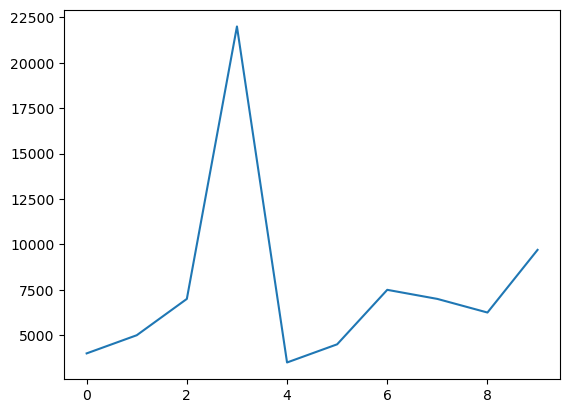

In [151]:
car_df['Price'].plot();

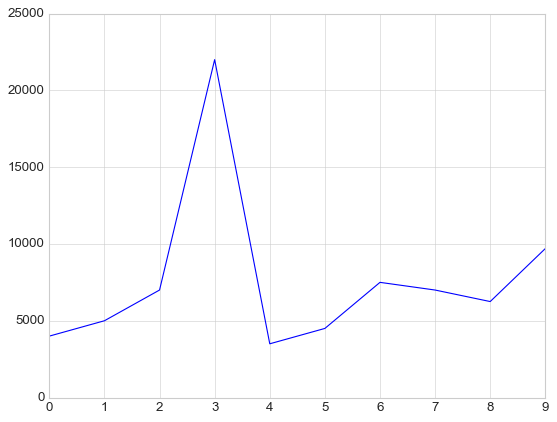

In [156]:
plt.style.use('seaborn-v0_8-whitegrid')
car_df['Price'].plot();

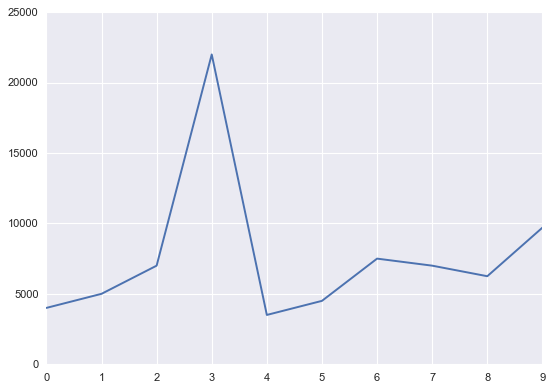

In [158]:
plt.style.use('seaborn-v0_8')
car_df['Price'].plot();

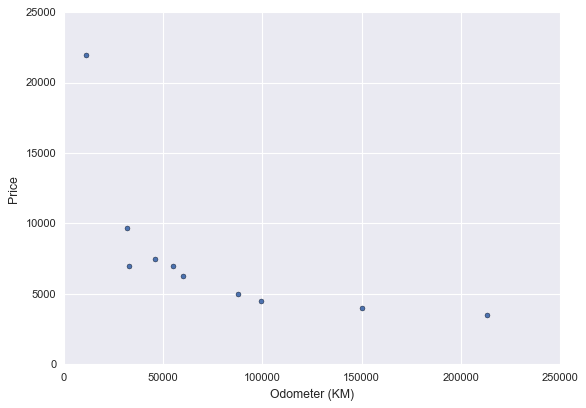

In [159]:
car_df.plot(x="Odometer (KM)", y="Price", kind="scatter");

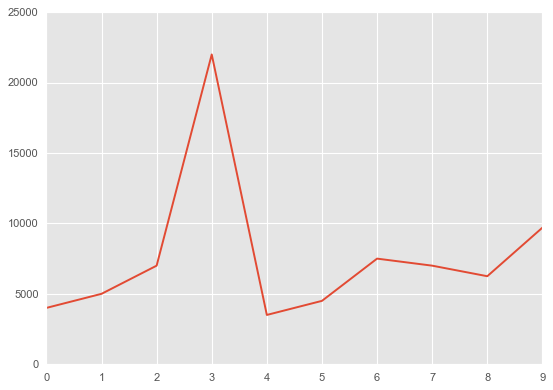

In [160]:
plt.style.use('ggplot')
car_df['Price'].plot();

In [163]:
# Create some data
x = np.random.randn(10, 4)
x

array([[-0.28938781, -1.02054419,  0.58999286,  1.39498128],
       [ 0.34305367,  0.69524559,  1.77251676,  1.91212294],
       [ 1.47836871,  0.27934419, -0.05039018,  1.22743523],
       [-0.61317171,  1.23756974, -1.37678931,  0.86005416],
       [ 0.91305805, -1.06466958, -0.51910196,  1.51779823],
       [-0.29136561, -0.51289966,  1.088825  ,  1.44401338],
       [ 2.91833279,  0.01726972, -1.3264739 ,  0.87363841],
       [-1.55623809, -1.07271442,  1.19860993, -0.03024661],
       [ 0.28798604, -0.16796669,  1.42015508, -0.44029844],
       [-0.01522018, -0.45376078,  0.79142578,  0.8957934 ]])

In [164]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-0.289388,-1.020544,0.589993,1.394981
1,0.343054,0.695246,1.772517,1.912123
2,1.478369,0.279344,-0.050390,1.227435
3,-0.613172,1.237570,-1.376789,0.860054
4,0.913058,-1.064670,-0.519102,1.517798
5,-0.291366,-0.512900,1.088825,1.444013
6,2.918333,0.017270,-1.326474,0.873638
7,-1.556238,-1.072714,1.198610,-0.030247
8,0.287986,-0.167967,1.420155,-0.440298
9,-0.015220,-0.453761,0.791426,0.895793


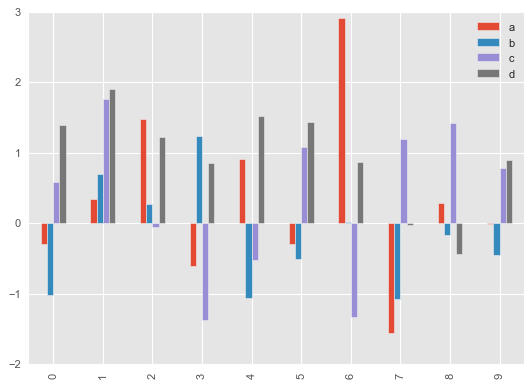

In [219]:
ax = df.plot(kind='bar')

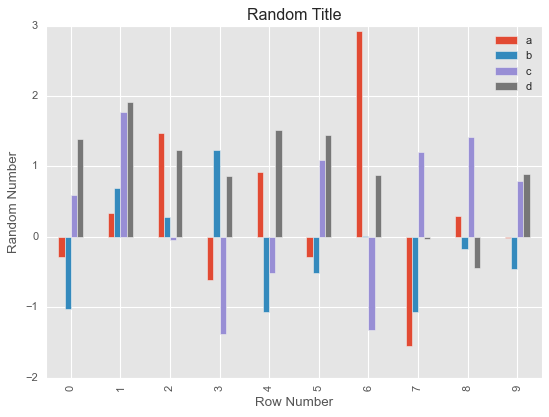

In [218]:
ax = df.plot(kind='bar')

# Customize with set method
ax.set(title="Random Title", xlabel="Row Number", ylabel="Random Number")

# Make the legend visible
ax.legend().set_visible(True)

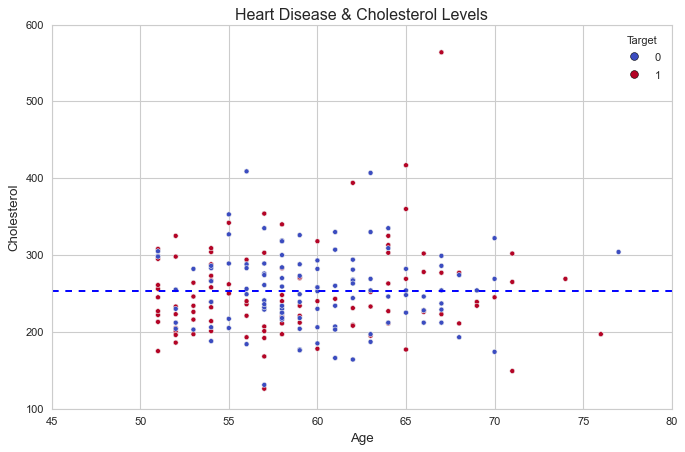

In [230]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# Real OO method
fig, ax = plt.subplots(figsize=(10, 6));

# PLot the data
scatter = ax.scatter(x=over_50['age'], y=over_50['chol'], c=over_50['target'], cmap="coolwarm"); # cmap changes the color scheme

# Customize the plot
ax.set(title="Heart Disease & Cholesterol Levels", xlabel="Age", ylabel='Cholesterol');

# Add legends
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50['chol'].mean(), linestyle='--');

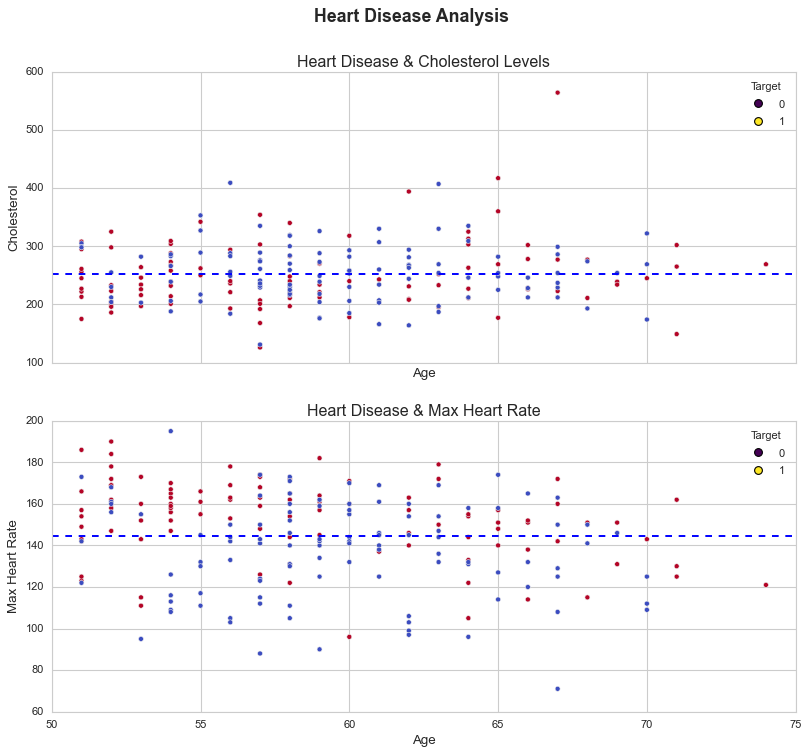

In [243]:
# Customizing the y annd x axis limitations
# Sublot of chol / age, thatlach /age

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True);

# Ax0
# PLot the data
scatter = ax0.scatter(x=over_50['age'], y=over_50['chol'], c=over_50['target'], cmap="coolwarm");

# Customize the plot
ax0.set(title="Heart Disease & Cholesterol Levels", xlabel="Age", ylabel='Cholesterol');
ax0.set_xlim([50, 80])

# Add legends
ax0.legend(*scatter0.legend_elements(), title="Target");

# Add a horizontal line
ax0.axhline(over_50['chol'].mean(), linestyle='--')

# Ax1
# PLot the data
scatter = ax1.scatter(x=over_50['age'], y=over_50['thalach'], c=over_50['target'], cmap="coolwarm");

# Customize the plot
ax1.set(title="Heart Disease & Max Heart Rate", xlabel="Age", ylabel='Max Heart Rate');
ax1.set_xlim([50, 75])
ax1.set_ylim([60, 200])

# Add legends
ax1.legend(*scatter1.legend_elements(), title="Target");

# Add a horizontal line
ax1.axhline(over_50['thalach'].mean(), linestyle='--')

# Add a title to the entire figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

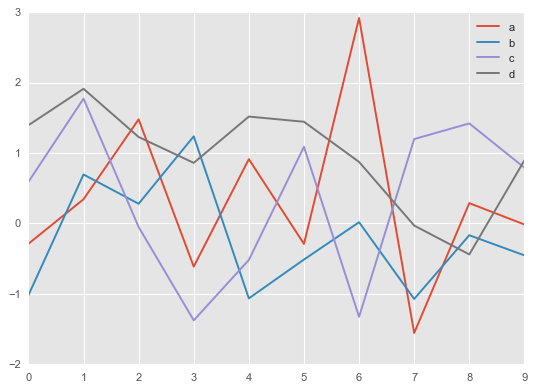

In [185]:
ax = df.plot()

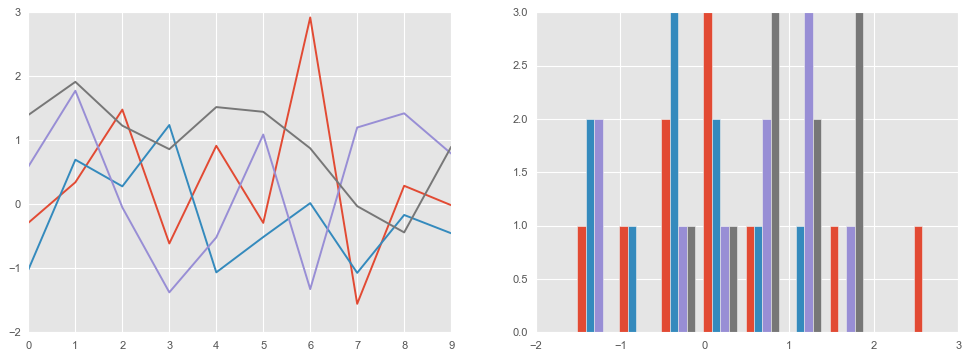

In [217]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 5));

ax0.plot(df);
ax1.hist(df, bins=9);